# Corso di Probabilità e Statistica - il metodo di massima verosimiglianza - parte 1

In questo capitolo analizzeremo i dati tramite il metodo 
di massima verosimiglianza.

Consideriamo una distribuzione teorica $p(x|\lambda)$ dipendendente da uno o più parameteri $\lambda$ e un
set di dati sperimentali $(x_1, ... x_N)$. Il metodo
consente di stimare il miglior parametro $\lambda$ che
descrive i dati, massimizzando la funzione

$$ L = \sum_i \log p(x_i|\lambda) $$

**Esempio: la distribuzione dei carichi di rottura in un materiale** 

Consideriamo dei campioni di ceramica sottoposti a carico e fratturati. Per ogni campione è stato misurato lo stress di rottura. I dati riportano anche altri parametri sperimentali.

Per maggiori dettagli vedi
https://www.itl.nist.gov/div898/handbook/eda/section4/eda42a.htm

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats 
import seaborn as sns
import matplotlib.pylab as plt

In [29]:
#carichiamo il file
strength = pd.read_csv("data/Strength_ceramic.dat",
                       sep="\s+",skiprows=48) # Le prime 48 righe sono descrittive
strength=strength.drop([0])

In [30]:
strength

,Id,Lab,Num,Test,Y,X1,X2,X3,X4,Trt,Set,Llab,Rep,Bat,Sblab,Set2
1,1,1.0,1.0,1.0,608.781,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.75,1.0,1.0,0.50,1.0
2,2,1.0,2.0,1.0,569.670,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.75,1.0,2.0,0.75,1.0
3,3,1.0,3.0,1.0,689.556,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.75,1.0,1.0,0.50,1.0
4,4,1.0,4.0,1.0,747.541,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.75,1.0,2.0,0.75,1.0
5,5,1.0,5.0,1.0,618.134,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.75,1.0,1.0,0.50,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,956,8.0,26.0,4.0,698.254,1.0,-1.0,-1.0,-1.0,2.0,2.0,8.25,2.0,2.0,8.50,32.0
477,957,8.0,27.0,4.0,611.999,1.0,-1.0,-1.0,-1.0,2.0,2.0,8.25,2.0,1.0,8.25,32.0
478,958,8.0,28.0,4.0,748.130,1.0,-1.0,-1.0,-1.0,2.0,2.0,8.25,2.0,2.0,8.50,32.0
479,959,8.0,29.0,4.0,530.680,1.0,-1.0,-1.0,-1.0,2.0,2.0,8.25,2.0,1.0,8.25,32.0


Il carico di rottura (strength) è dato dalla variabile Y
come possiamo vedere dalle istruzione in cima al file.

Se volessi un datafreme specifico posso farlo con:

In [31]:
reduced=strength[["Y", "X1", "X2"]]

In [32]:
reduced

,Y,X1,X2
1,608.781,-1.0,-1.0
2,569.670,-1.0,-1.0
3,689.556,-1.0,-1.0
4,747.541,-1.0,-1.0
5,618.134,-1.0,-1.0
...,...,...,...
476,698.254,1.0,-1.0
477,611.999,1.0,-1.0
478,748.130,1.0,-1.0
479,530.680,1.0,-1.0


In [7]:
with open("data/Strength_ceramic.dat") as myfile:
    head = [next(myfile) for x in range(24)]

In [8]:
head

['This is Dataplot data file     JAHANMI2.DAT\n',
 'Effect of Machining Factors on Strength of Ceramics\n',
 '(Longitudinal Data Only)\n',
 'Response variable                  = ceramic strength\n',
 'Number of observations             =  480\n',
 'Number of variables per line image =   15\n',
 'Order of variables on a line image--\n',
 '   1. Factor  1 = Observation Id (1 to 960)\n',
 '   2. Factor  2 = Lab (8 levels: 1 to 8)\n',
 '   3. Factor  3 = Bar id within lab (1 to 30)\n',
 '   4. Factor  4 = Set xxx (4 levels: 1 to 4)\n',
 '   5. Response Variable Y = Strength of Ceramic\n',
 '   6. Factor  5 = Table Speed    (2 levels: slow and fast)\n',
 '   7. Factor  6 = Down Feed Rate (2 levels: slow & fast)\n',
 '   8. Factor  7 = Wheel Grit     (2 levels:     )\n',
 '   9. Factor  8 = Direction      (1 level : longitudinal only)\n',
 '  10. Factor  9 = Treatment      (2**4 = 16 levels: 1 to 16)\n',
 '  11. Factor 10 = Set of 15 within lab (2 levels: 1 and 2)\n',
 '  12. Factor 11 = Rep

Notiamo che abbiamo una serie di fattori accessori che riguardano alcuni parametri sperimentali,  dove è stato svolto l'esperimento (Lab) e il batch dei campioni etc

Possiamo fittare i dati (in particolare la colonna Y) con MLE utilizzando la funzione scipy.stats.DIST.fit()
dove DIST è la distribuzione desiderata. 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.fit.html
Per le distribuzioni standard possiamo utalizzare questa funzione direttamente.

In questo vogliamo usare la distribuzione di Weibull:

$p(x|c,x_0)=k (x/x_0)^{k-1} \exp (-(x/x_0)^k)$

utilizziamo la funzione weibull_min mettendo loc=0
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.weibull_min.html

In [9]:
k, loc, x_0=scipy.stats.weibull_min.fit(strength.Y, floc=0)

In [11]:
k, x_0

(10.067647171136558, 682.651145028511)

Controlliamo ora graficamente il fit

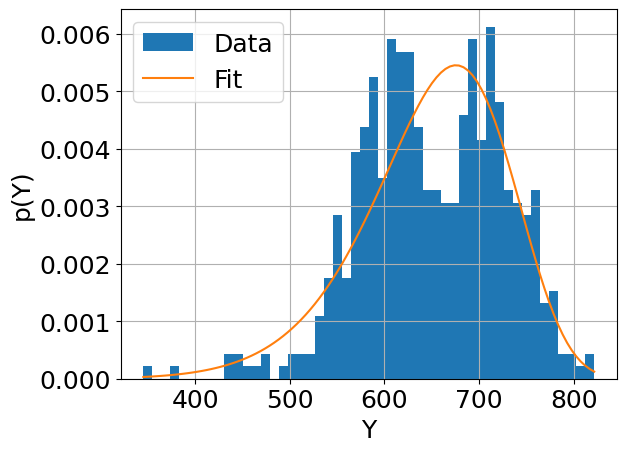

In [10]:
# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 18})
xmin=np.min(strength.Y)
xmax=np.max(strength.Y)
x = np.linspace(xmin,xmax,101)
# Istogramma di tutti i dati
strength.Y.hist(bins=50, density=True, label='Data')
# fit
W=scipy.stats.weibull_min(k,loc=0, scale=x_0) 
plt.plot(x, W.pdf(x), label="Fit")
plt.xlabel('Y')
plt.ylabel('p(Y)')
plt.legend()

Il fit non è eccezionale. La cosa che ci può fare insospettire è la presenza di un doppio picco. Questo potrebbe essere dovuto al fatto che abbiamo mischiato insieme tutti i dati indipendentemente dai fattori sperimentali

**Esercizio** 

Esplorare l'effetto dei vari fattori per cercare di capire quale siano i fattori che influenzano di più la distribuzione. Possiamo proecedere come seque:


<Axes: xlabel='X1', ylabel='Y'>

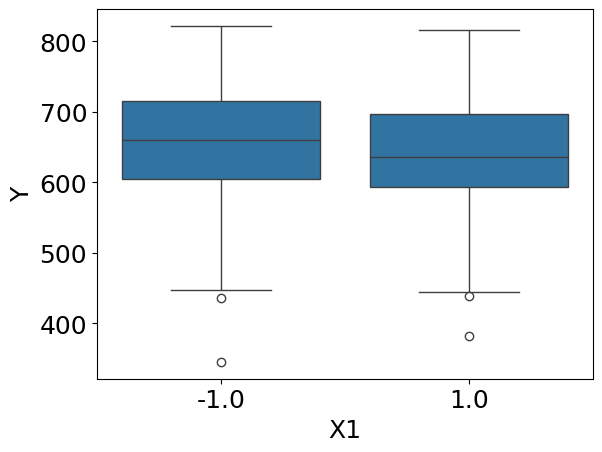

In [12]:
sns.boxplot(data=strength, x="X1", y="Y")

Da questo grafico si vede che il fattore X1 non è molto rilevante. Esplorate gli altri fattori allo stesso modo e poi vedete se il fit migliora separando i dati a seconda dei fattori.

<Axes: xlabel='Lab', ylabel='Y'>

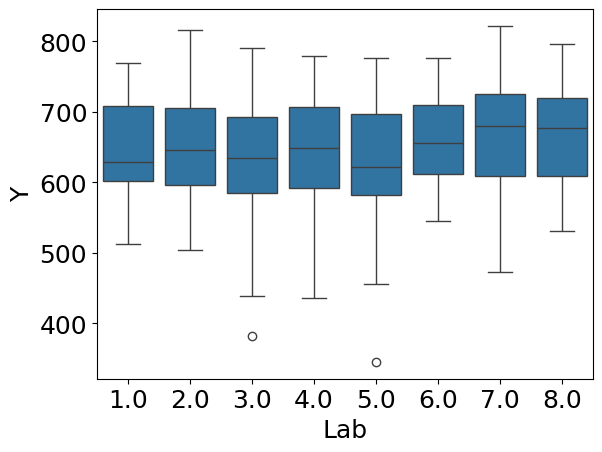

In [13]:
sns.boxplot(data=strength, x="Lab", y="Y")

<Axes: xlabel='Test', ylabel='Y'>

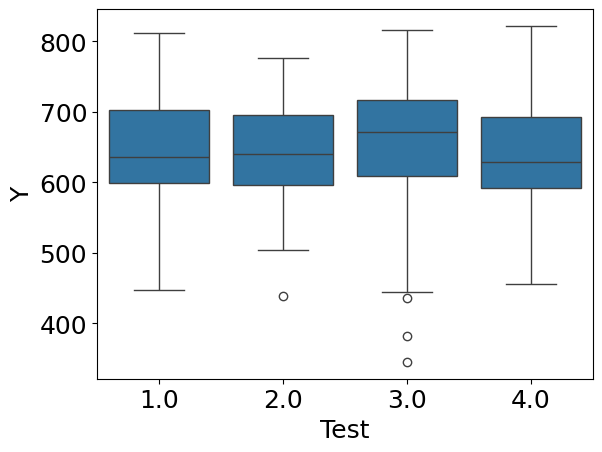

In [14]:
sns.boxplot(data=strength, x="Test", y="Y")

<Axes: xlabel='Bat', ylabel='Y'>

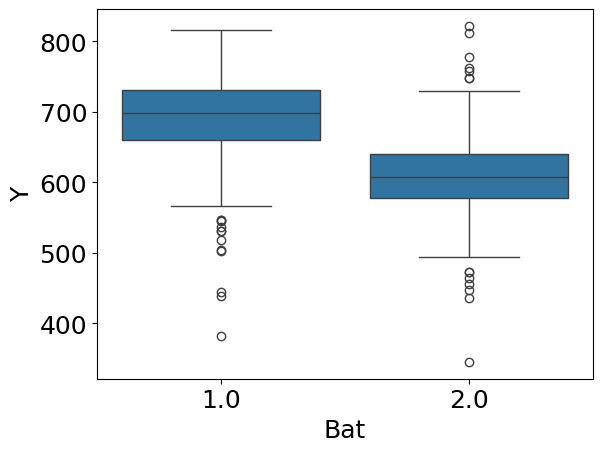

In [19]:
sns.boxplot(data=strength, x="Bat", y="Y")

**Ecco**, a differenza dei vari altri fattori questo sembra dividere in due i dati prodotti!

**Esempio:** Separiamo i dati a seconda del fattore batch e poi fittiamo separatamente.

In [22]:
Bat1=strength[strength.Bat==1]
Bat2=strength[strength.Bat==2]

Fittiamo i dati separatamente:

In [23]:
k1, loc, x_1=scipy.stats.weibull_min.fit(Bat1.Y, floc=0)
k2, loc, x_2=scipy.stats.weibull_min.fit(Bat2.Y, floc=0)

Plottiamo i dati separatamente

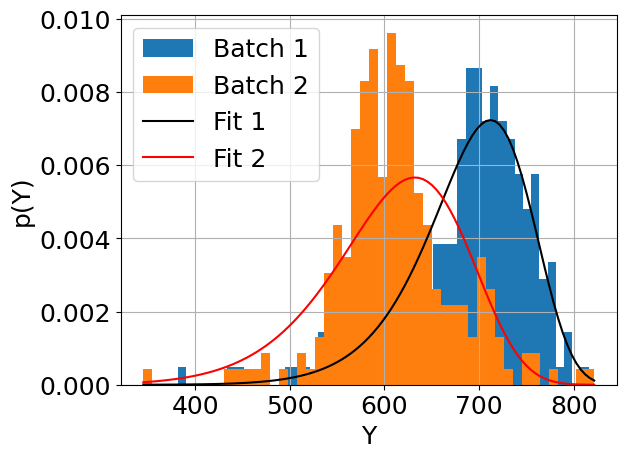

In [24]:
# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 18})
xmin=np.min(strength.Y)
xmax=np.max(strength.Y)
x = np.linspace(xmin,xmax,101)
# Istogramma di tutti i dati
Bat1.Y.hist(bins=50, density=True, label='Batch 1')
Bat2.Y.hist(bins=50, density=True, label='Batch 2')
# fit
W1=scipy.stats.weibull_min(k1,loc=0, scale=x_1) 
W2=scipy.stats.weibull_min(k2,loc=0, scale=x_2)
plt.plot(x, W1.pdf(x), label="Fit 1", color="black")
plt.plot(x, W2.pdf(x), label="Fit 2", color="red")
plt.xlabel('Y')
plt.ylabel('p(Y)')
plt.legend()

Distribuzioni cumulate

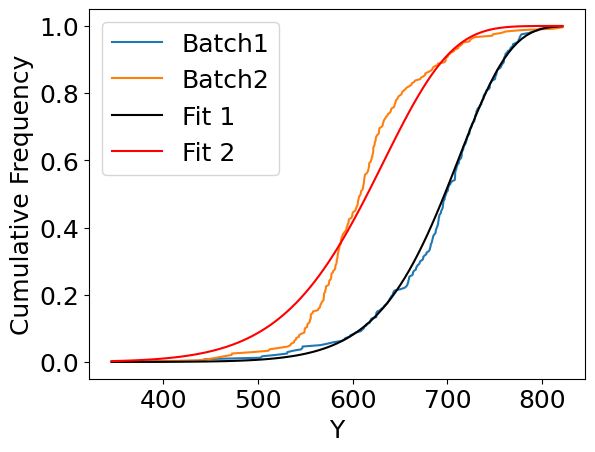

In [26]:
xmin=np.min(strength.Y)
xmax=np.max(strength.Y)
x = np.linspace(xmin,xmax,101)
y1=np.sort(Bat1.Y)
idx1 = [ i/len(y1) for i in range(len(y1))]
y2=np.sort(Bat2.Y)
idx2 = [ i/len(y2) for i in range(len(y2))]
plt.xlabel('Y')
plt.ylabel('Cumulative Frequency')
plt.plot(y1,idx1,label="Batch1")
plt.plot(y2,idx2,label="Batch2")
plt.plot(x, W1.cdf(x), label="Fit 1", color="black")
plt.plot(x, W2.cdf(x), label="Fit 2", color="red")
plt.legend()

Si vede come la prima distribuzione fitta abbastanza bene mentre la seconda un pochino meno quindi potrebbe essere un sotto set che li differenzia! Forse ci sono altre set

## Sblab

Per prima cosa proviamo a studiare i dati per quanto riguarda il parametro Sblab

/tmp/ipykernel_3198/1570272880.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis=ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


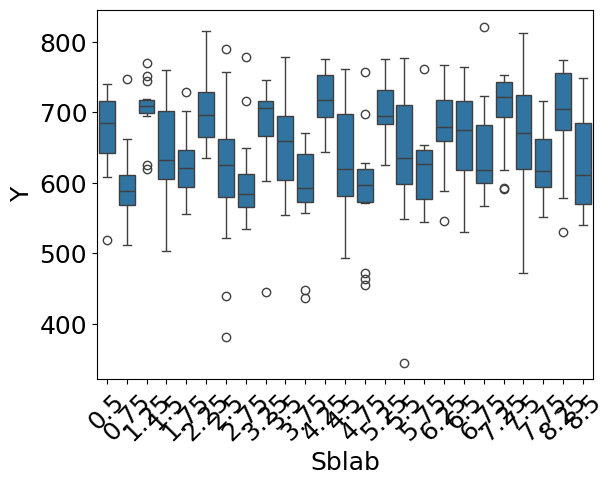

In [38]:
ax=sns.boxplot(data=strength, x="Sblab", y="Y")
axis=ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

Può assumere più di due valori quindi ho calcolato la mediana per ogni valore che può assumere sblab.

In [ ]:
t=strength["Sblab"].unique()
med = np.zeros(len(t))
for i in range(len(t)):
    med[i] = strength[strength.Sblab==t[i]].Y.median()

In [41]:
mediaSblab=med.mean() # Media delle mediane
mediaSblab

651.79676

Poi suddivido il datasets in funzione di questo valore. Quindi un datasets minore della media delle mediane e un dato maggiore della media delle mediane.

In [42]:
Sblab1=strength[strength.Y>=mediaSblab]
Sblab2=strength[strength.Y<mediaSblab]

In [43]:
Sblab1

,Id,Lab,Num,Test,Y,X1,X2,X3,X4,Trt,Set,Llab,Rep,Bat,Sblab,Set2
3,3,1.0,3.0,1.0,689.556,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.75,1.0,1.0,0.50,1.0
4,4,1.0,4.0,1.0,747.541,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.75,1.0,2.0,0.75,1.0
7,7,1.0,7.0,1.0,680.203,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.75,1.0,1.0,0.50,1.0
9,9,1.0,9.0,1.0,726.232,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.75,1.0,1.0,0.50,1.0
13,13,1.0,13.0,1.0,740.447,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.75,1.0,1.0,0.50,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,953,8.0,23.0,4.0,677.933,1.0,-1.0,-1.0,-1.0,2.0,2.0,8.25,2.0,1.0,8.25,32.0
475,955,8.0,25.0,4.0,674.600,1.0,-1.0,-1.0,-1.0,2.0,2.0,8.25,2.0,1.0,8.25,32.0
476,956,8.0,26.0,4.0,698.254,1.0,-1.0,-1.0,-1.0,2.0,2.0,8.25,2.0,2.0,8.50,32.0
478,958,8.0,28.0,4.0,748.130,1.0,-1.0,-1.0,-1.0,2.0,2.0,8.25,2.0,2.0,8.50,32.0


In [44]:
k1, loc, x_1=scipy.stats.weibull_min.fit(Sblab1.Y, floc=0)
k2, loc, x_2=scipy.stats.weibull_min.fit(Sblab2.Y, floc=0)

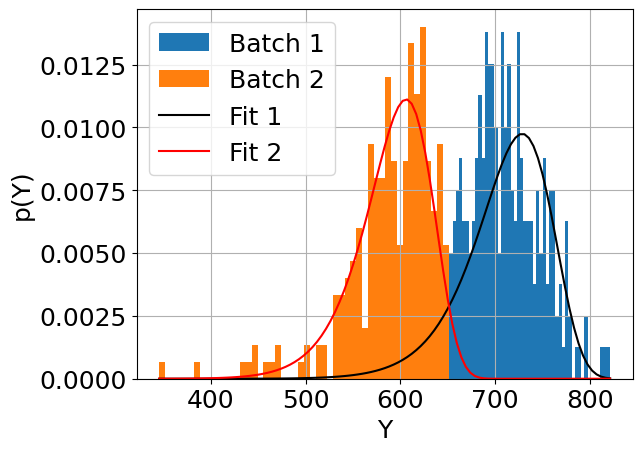

In [45]:
plt.rcParams.update({'font.size': 18})
xmin=np.min(strength.Y)
xmax=np.max(strength.Y)
x = np.linspace(xmin,xmax,101)
# Istogramma di tutti i dati
Sblab1.Y.hist(bins=50, density=True, label='Batch 1')
Sblab2.Y.hist(bins=50, density=True, label='Batch 2')
# fit
W1=scipy.stats.weibull_min(k1,loc=0, scale=x_1) 
W2=scipy.stats.weibull_min(k2,loc=0, scale=x_2)
plt.plot(x, W1.pdf(x), label="Fit 1", color="black")
plt.plot(x, W2.pdf(x), label="Fit 2", color="red")
plt.xlabel('Y')
plt.ylabel('p(Y)')
plt.legend()

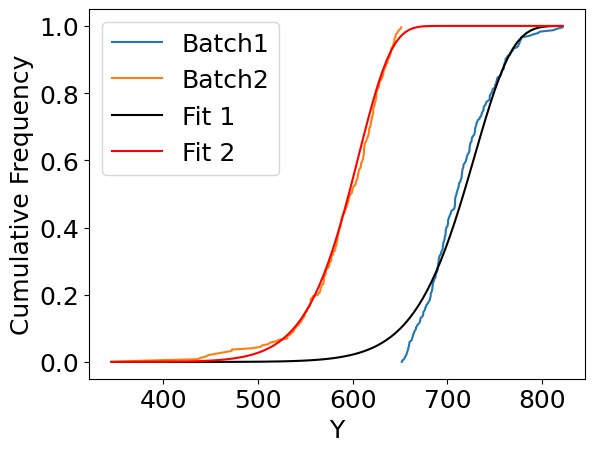

In [47]:
xmin=np.min(strength.Y)
xmax=np.max(strength.Y)
x = np.linspace(xmin,xmax,101)
y1=np.sort(Sblab1.Y)
idx1 = [ i/len(y1) for i in range(len(y1))]
y2=np.sort(Sblab2.Y)
idx2 = [ i/len(y2) for i in range(len(y2))]
plt.xlabel('Y')
plt.ylabel('Cumulative Frequency')
plt.plot(y1,idx1,label="Batch1")
plt.plot(y2,idx2,label="Batch2")
plt.plot(x, W1.cdf(x), label="Fit 1", color="black")
plt.plot(x, W2.cdf(x), label="Fit 2", color="red")
plt.legend()

Questo metodo non è ottimale ma in zone più centrate può andare sicuramente meglio. In questo modo non identifico i fattori perchè non prendo mai le code. Quindi non mi da nulla questo!

## Quale altra variabile?

X1 X2 X3 e X4 come abbiamo visto non porta nulla. Neanche gli altri sembrano portare nulla. Proviamo con Rep ed effettivamente qualcosa potrebbe esserci. Dobbiamo segmentare Batch 2


In [48]:
Bat1=strength[strength.Bat==1]
Bat2=strength[strength.Bat==2]

In [49]:
k1, loc, x_1=scipy.stats.weibull_min.fit(Bat1.Y, floc=0)
k2, loc, x_2=scipy.stats.weibull_min.fit(Bat2.Y, floc=0)

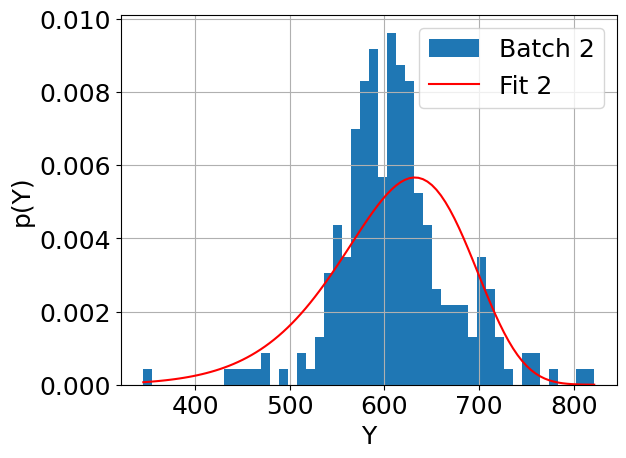

In [51]:
# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 18})
xmin=np.min(strength.Y)
xmax=np.max(strength.Y)
x = np.linspace(xmin,xmax,101)
# Istogramma di tutti i dati
#Bat1.Y.hist(bins=50, density=True, label='Batch 1')
Bat2.Y.hist(bins=50, density=True, label='Batch 2')
# fit
#W1=scipy.stats.weibull_min(k1,loc=0, scale=x_1) 
W2=scipy.stats.weibull_min(k2,loc=0, scale=x_2)
#plt.plot(x, W1.pdf(x), label="Fit 1", color="black")
plt.plot(x, W2.pdf(x), label="Fit 2", color="red")
plt.xlabel('Y')
plt.ylabel('p(Y)')
plt.legend()

Sembra che ci siano due picchetti. Quindi andiamo a vedere i la divisione dei valori per quanto riguarda solo questa distribuzione

In [53]:
Bat2

,Id,Lab,Num,Test,Y,X1,X2,X3,X4,Trt,Set,Llab,Rep,Bat,Sblab,Set2
2,2,1.0,2.0,1.0,569.670,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.75,1.0,2.0,0.75,1.0
4,4,1.0,4.0,1.0,747.541,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.75,1.0,2.0,0.75,1.0
6,6,1.0,6.0,1.0,612.182,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.75,1.0,2.0,0.75,1.0
8,8,1.0,8.0,1.0,607.766,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.75,1.0,2.0,0.75,1.0
10,10,1.0,10.0,1.0,605.380,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.75,1.0,2.0,0.75,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,952,8.0,22.0,4.0,555.724,1.0,-1.0,-1.0,-1.0,2.0,2.0,8.25,2.0,2.0,8.50,32.0
474,954,8.0,24.0,4.0,611.874,1.0,-1.0,-1.0,-1.0,2.0,2.0,8.25,2.0,2.0,8.50,32.0
476,956,8.0,26.0,4.0,698.254,1.0,-1.0,-1.0,-1.0,2.0,2.0,8.25,2.0,2.0,8.50,32.0
478,958,8.0,28.0,4.0,748.130,1.0,-1.0,-1.0,-1.0,2.0,2.0,8.25,2.0,2.0,8.50,32.0


/tmp/ipykernel_3198/1430329791.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis=ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


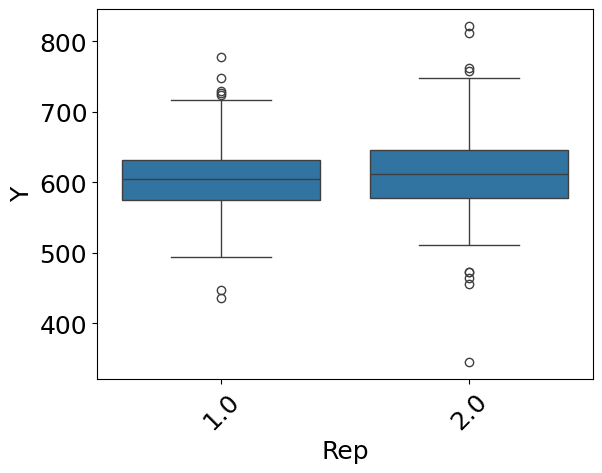

In [62]:
ax=sns.boxplot(data=Bat2, x="Rep", y="Y")
axis=ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [64]:
X11=Bat2[Bat2.Rep==1]
X12=Bat2[Bat2.Rep==2]

In [65]:
k1, loc, x_1=scipy.stats.weibull_min.fit(X11.Y, floc=0)
k2, loc, x_2=scipy.stats.weibull_min.fit(X12.Y, floc=0)

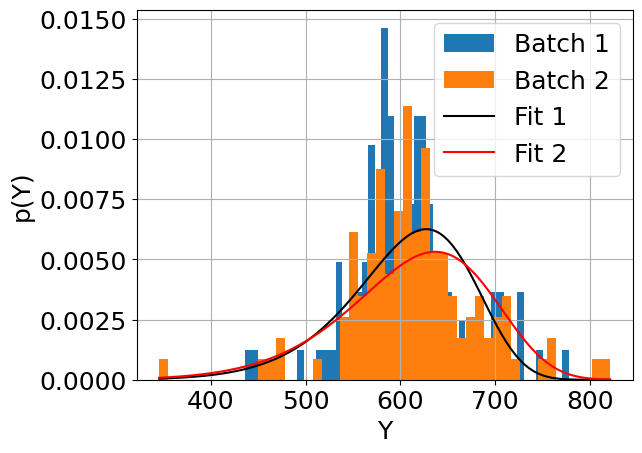

In [67]:
# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 18})
xmin=np.min(Bat2.Y)
xmax=np.max(Bat2.Y)
x = np.linspace(xmin,xmax,101)
# Istogramma di tutti i dati
X11.Y.hist(bins=50, density=True, label='Batch 1')
X12.Y.hist(bins=50, density=True, label='Batch 2')
# fit
W1=scipy.stats.weibull_min(k1,loc=0, scale=x_1) 
W2=scipy.stats.weibull_min(k2,loc=0, scale=x_2)
plt.plot(x, W1.pdf(x), label="Fit 1", color="black")
plt.plot(x, W2.pdf(x), label="Fit 2", color="red")
plt.xlabel('Y')
plt.ylabel('p(Y)')
plt.legend()

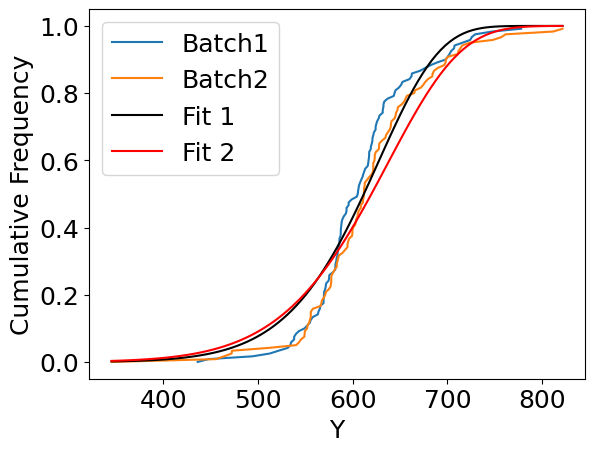

In [68]:
xmin=np.min(strength.Y)
xmax=np.max(strength.Y)
x = np.linspace(xmin,xmax,101)
y1=np.sort(X11.Y)
idx1 = [ i/len(y1) for i in range(len(y1))]
y2=np.sort(X12.Y)
idx2 = [ i/len(y2) for i in range(len(y2))]
plt.xlabel('Y')
plt.ylabel('Cumulative Frequency')
plt.plot(y1,idx1,label="Batch1")
plt.plot(y2,idx2,label="Batch2")
plt.plot(x, W1.cdf(x), label="Fit 1", color="black")
plt.plot(x, W2.cdf(x), label="Fit 2", color="red")
plt.legend()